# Sentiment Analysis of Amazon Reviews using traditional approach and Transformer based model roberta

In this project I implemented a Natural Language Processing Project creating a Sentiment Analysis classifier with NLTK's traditional and Transformers. The project is to classify the seniment of amazon customer reviews and at the end comparision of difference between model outputs from the vader and transformer-based model roberta. The dataset being used in this project is available at kaggle: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [87]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')  # stylesheet for plots

import nltk

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')  # reading data

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# fetching review at 0 index in the Text column
# df['Text'].value[0]
df['Text'][0]


'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [9]:
df.shape

(568454, 10)

In [10]:
# as the dataset is huge with many rows and I am using my local machine for implementation
# thatswhy I am using just 500 rows, this project is for learning purpose.
df = df.head(500)
print(df.shape)

(500, 10)


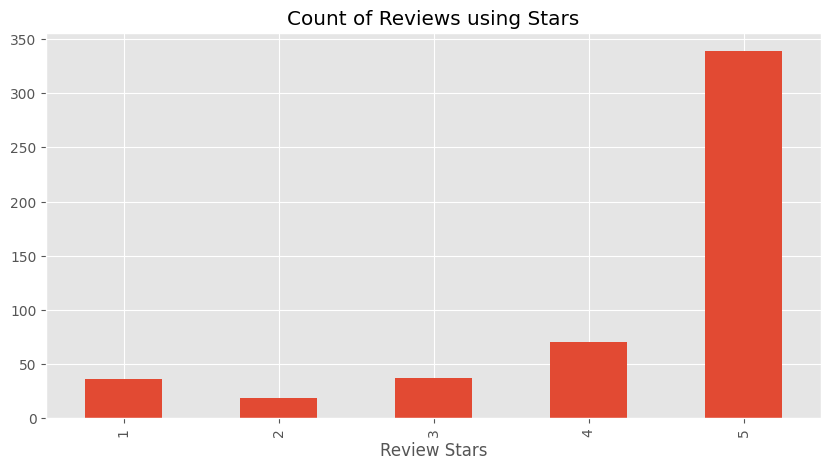

In [11]:
# EDA

axis = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews using Stars', figsize=(10, 5))

axis.set_xlabel('Review Stars')

plt.show()


In [12]:
# NLTK

example = df['Text'][50]
print(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [13]:
nltk.download('punkt')  # You may need to download the punkt tokenizer data if you haven't already

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
tokens = nltk.word_tokenize(example)

In [15]:
tokens [:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
tagged = nltk.pos_tag(tokens) # part of speech

In [19]:
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [20]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [21]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [22]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [24]:
# Vader seniment scoring
# vader cannot get the relationships between words
# remove stop words like (the a and) etc which has not really feelings etc
# bag of words approach

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm  # Progressed bar tracker

sia = SentimentIntensityAnalyzer()  # creating object



In [25]:
sia.polarity_scores('I am so excited today') #compound score is avrg from -1 to 1


{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.4005}

In [26]:
sia.polarity_scores('He is a depressed soul.')

{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

In [27]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [88]:
# run the polarity score on whole dataset for calclusating positive neagtive and compund, I have limit the dataset to 500
dict = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Text']
  myid = row['Id']
  dict[myid] = sia.polarity_scores(text)
  #break


  0%|          | 0/500 [00:00<?, ?it/s]

In [89]:
dict

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [90]:
pd.DataFrame(dict).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [91]:
vaders = pd.DataFrame(dict).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
#vaders = df.merge(vaders, on='Id', how='left')
#merged_df = df.merge(vaders, on='Id', how='left')



In [92]:
vaders.head() # score and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


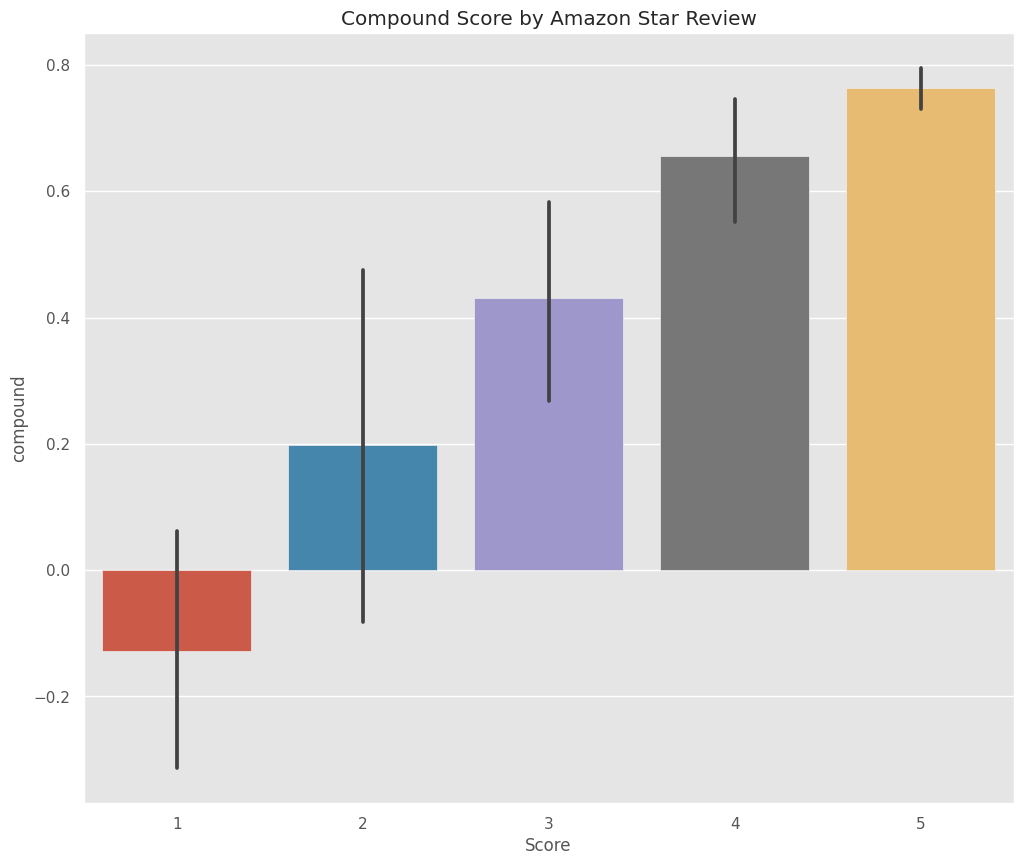

In [93]:
ax = sns.barplot(data=vaders, x='Score', y ='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

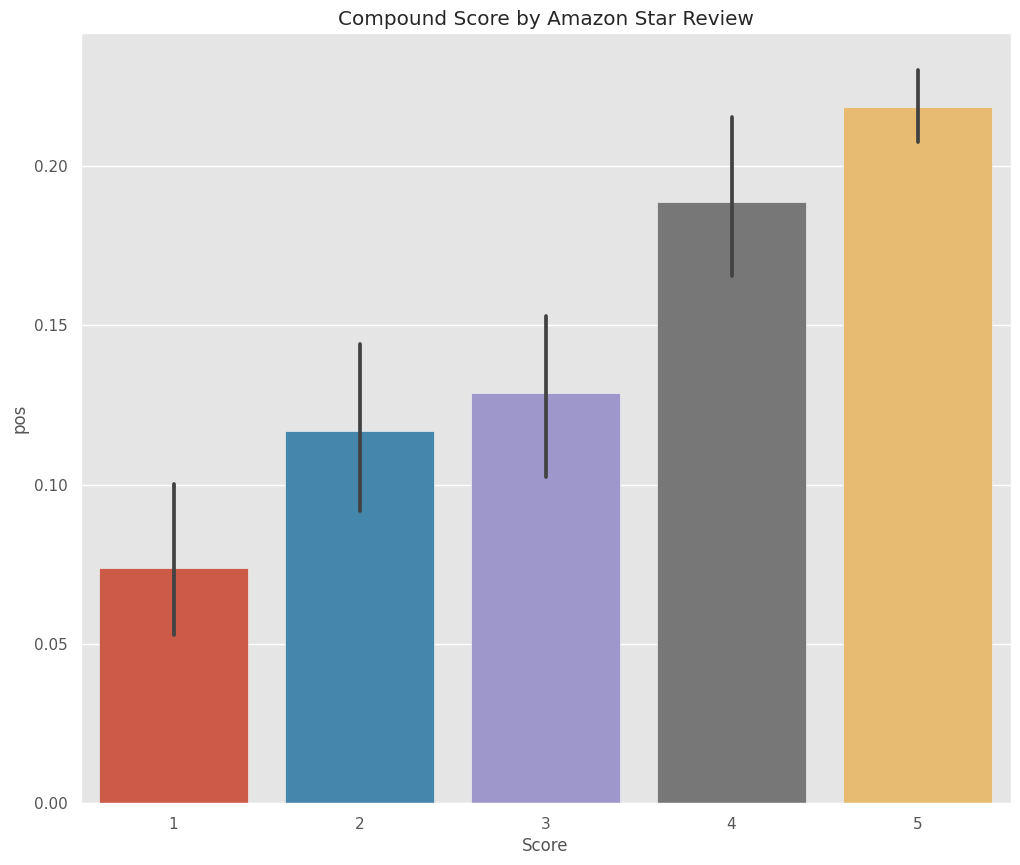

In [94]:
ax = sns.barplot(data=vaders, x='Score', y ='pos')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

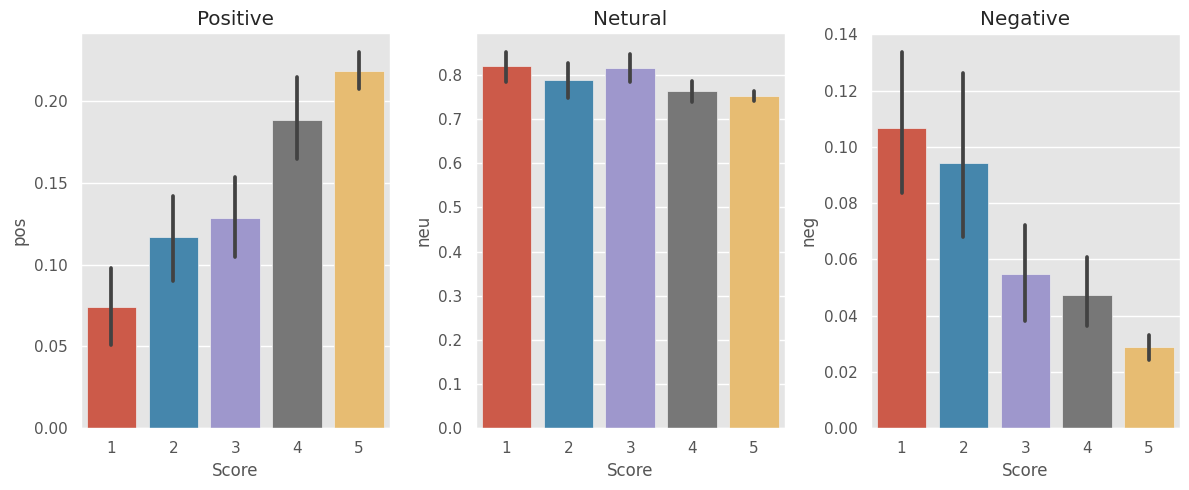

In [95]:
fig, axs = plt.subplots(1, 3, figsize = (12, 5))
sns.barplot(data=vaders, x='Score', y ='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score', y ='neu', ax = axs[1])
sns.barplot(data=vaders, x='Score', y ='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Netural')
axs[2].set_title('Negative')
plt.tight_layout() # avoid overlapping
plt.show()

In [39]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.4 MB/s eta 0:00:00


Applying Roberta a Transformer based model by hugging face. Transformers are attention based encoder decoder models which first introduce in 2017 for NLP translation task and achieve state of the art results. The best part of transformer is these models can remeber long sentences and also the relationship between words in each sentence which makes them better than RNN and LSTM etc. Transfromers are computaionally heavy models.

In [40]:
# importing requirements
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [41]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [57]:
# run roberta

encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)


{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [58]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

In [65]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try:
      text = row['Text']
      myid = row['Id']
      vader_result = sia.polarity_scores(text)
      vader_result_rename = {}
      for key, values in vader_result.items():
          vader_result_rename[f"vader_{key}"] = values
          roberta_result = polarity_scores_roberta(text)
      # combing two dict
          both = {**vader_result_rename, **roberta_result}
          res[myid] = both
  except RuntimeError:
      print(f'broke for Id{myid}')



  0%|          | 0/500 [00:00<?, ?it/s]

broke for Id83
broke for Id187


In [96]:
vader_result

{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9811}

In [67]:
roberta_result

{'roberta_neg': 0.0024397594,
 'roberta_neu': 0.011327226,
 'roberta_pos': 0.986233}

In [97]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.0024397594,
 'roberta_neu': 0.011327226,
 'roberta_pos': 0.986233}

In [98]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [99]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [100]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<ipython-input-101-a3d7926649db>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = results_df.corr()


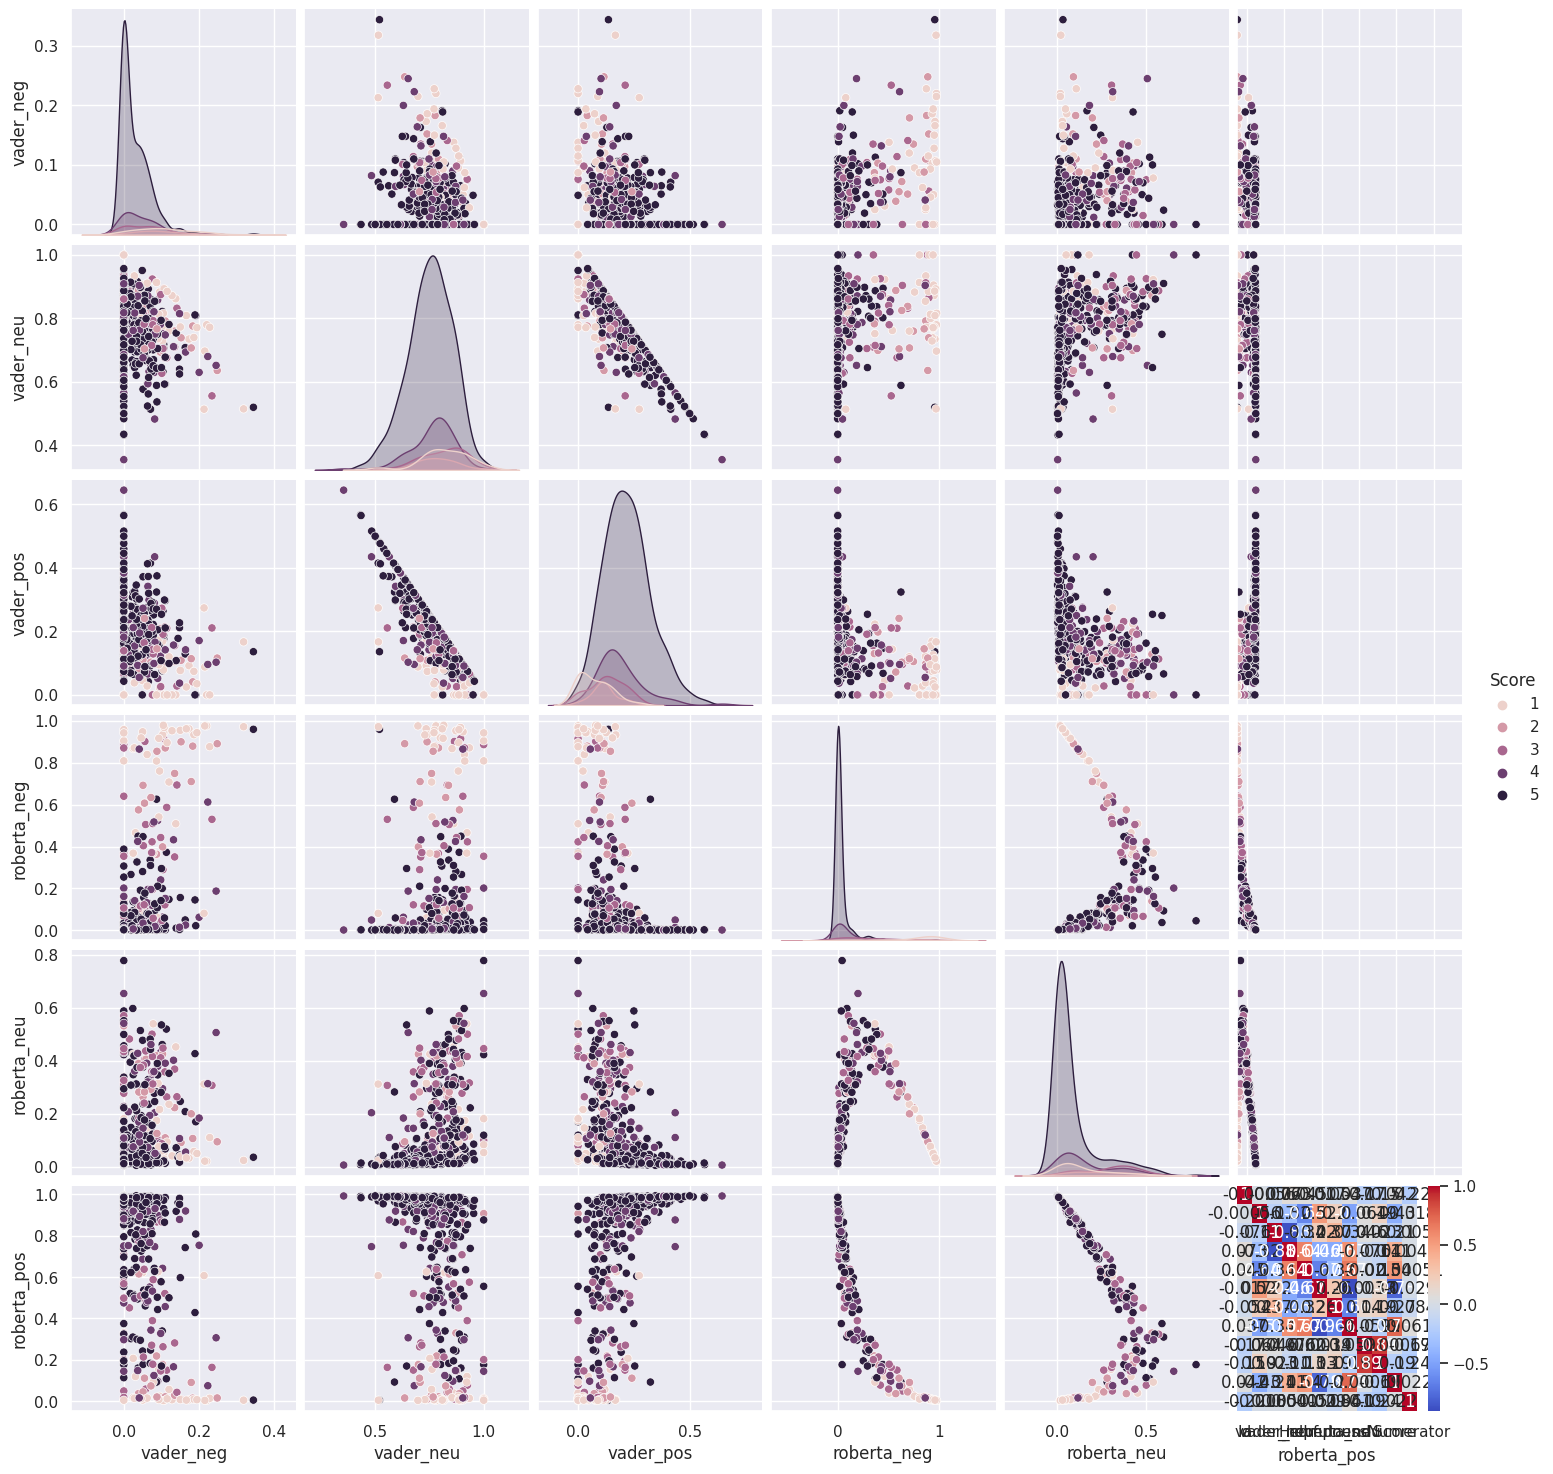

In [101]:
#  comparisoon of both
sns.set(rc={'figure.figsize':(12, 10)})
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue = 'Score')
corr = results_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [86]:
# examplses testing

results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[25]

'No tea flavor at all. Just whole brunch of artifial flavors. It is not returnable. I wasted 20+ bucks.'

In [102]:
# examplses testing

results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[25]

"I wouldn't even think of buying this product unless I know the price per unit. How can I compare other items online or in a store?"

In [83]:
# examplses testing

results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[25]

'For those of us on a low carb diet these little tablets are just the thing.<br /><br />Two years ago I started cycling again after many years but was having heart arrhythmia after longer rides in high heat.  I was drinking plain water but did a little research and thought electrolytes might be the issue.  Gatorade wasn\'t an option because it is so loaded with carbohydrates so I looked around for a low-carb alternative.  The "zero carb" sports drinks didn\'t help so what to do?  One day I ran across these at my bike shop so tried a tube of them.....voila!...problem solved!!<br /><br />I\'ve shared them with two friends in particular whose problems with leg cramps were resolved while using these.<br /><br />These guys got it right -- they are superbly formulated and simply work.....'

In [84]:
# examplses testing

results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[25]

'i know i cannot make tea this good.  granted, i am not from the south but i know i have never enjoyed tea that was this sweet without being too sweet.  it tastes crisp.'